In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
%matplotlib inline
import cufflinks as cf
cf.go_offline()

In [2]:
loans=pd.read_csv('loan_data.csv')

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
sb.set_style('whitegrid')


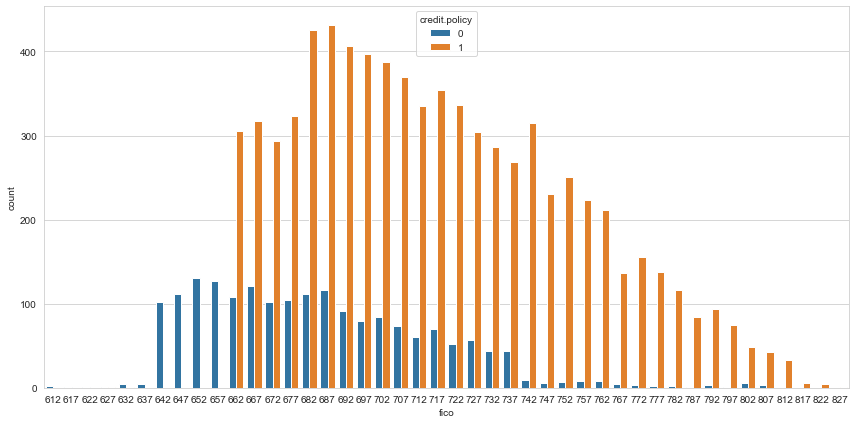

In [6]:
plt.figure(figsize=(12,6))
sb.countplot(x='fico',data=loans,hue='credit.policy')
#plt.legend('top right')
plt.tight_layout()

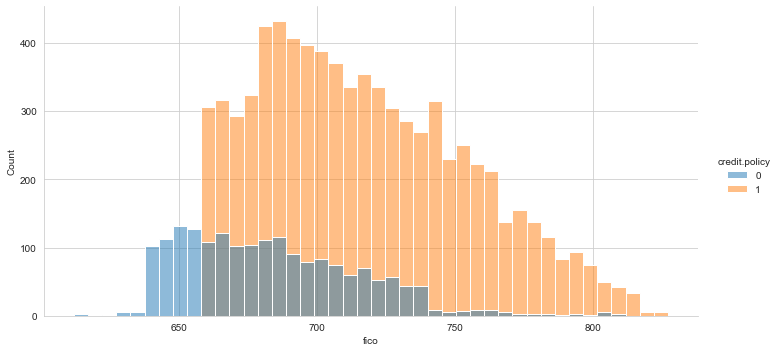

In [7]:
sb.displot(x='fico',data=loans,hue='credit.policy',aspect=2)

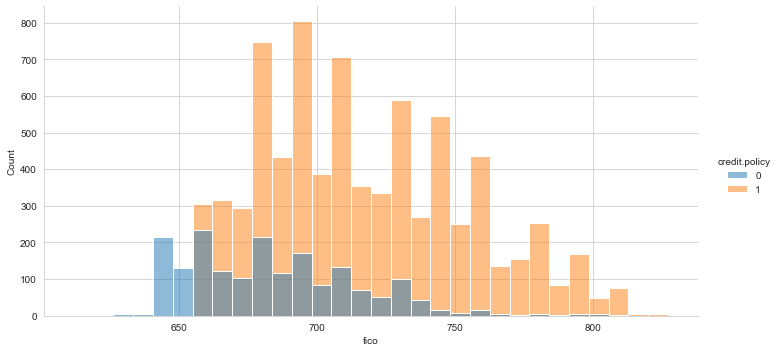

In [22]:
sb.displot(x='fico',data=loans,hue='credit.policy',bins=30,aspect=2)

<AxesSubplot:xlabel='fico', ylabel='Count'>

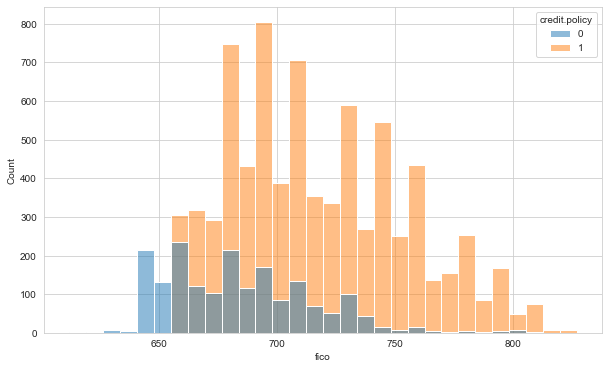

In [13]:
plt.figure(figsize=(10,6))
sb.histplot(x='fico',data=loans,hue='credit.policy',bins=30,)

In [85]:
loans['fico'].iplot(kind='hist')

In [65]:
px.histogram(loans,x='fico',color='credit.policy',marginal='box',)

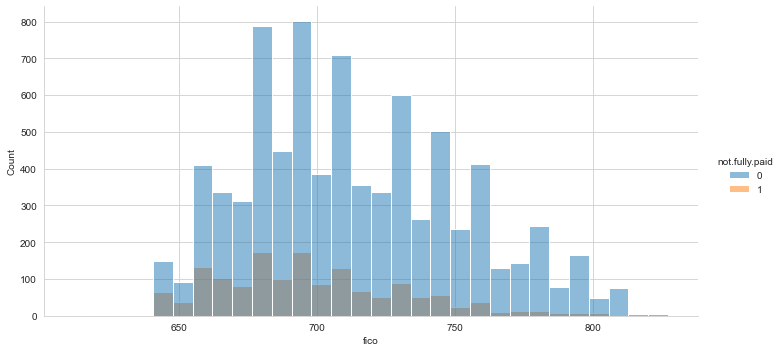

In [20]:
sb.displot(x='fico',data=loans,hue='not.fully.paid',bins=30,aspect=2)

In [97]:
print(loans['purpose'].unique())

['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


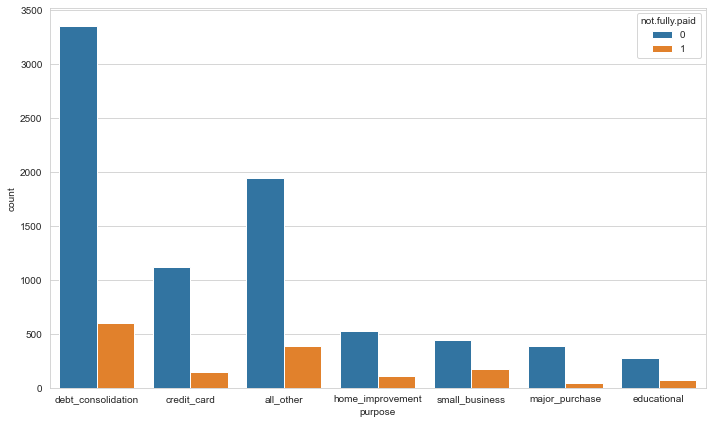

In [25]:
plt.figure(figsize=(10,6))
sb.countplot(x='purpose',data=loans,hue='not.fully.paid')
plt.tight_layout()

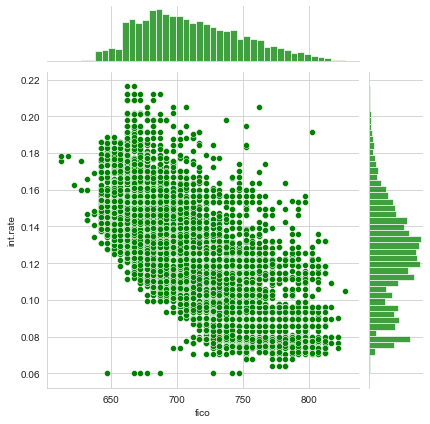

In [101]:
sb.jointplot(x='fico',y='int.rate',data=loans,color='green')

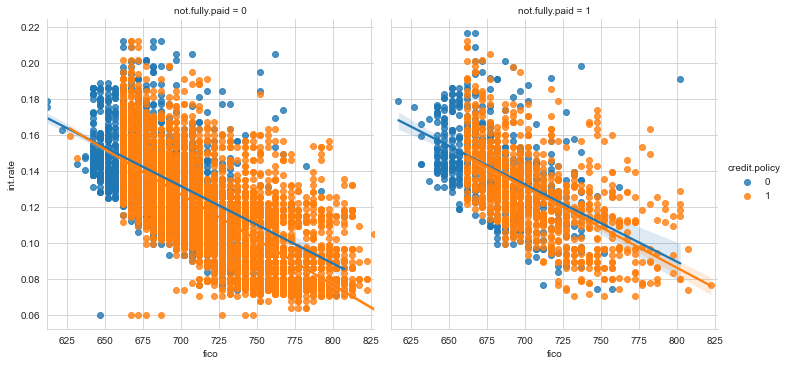

In [119]:
sb.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy',col='not.fully.paid')

# Setting up the Data

In [118]:
loans.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [ ]:
# we can see only purpose is Alphabetic all others are numerical 
# so we have to convert it into dummy variable

In [113]:
loans['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [114]:
cat_feats=['purpose']
cat_feats

['purpose']

In [117]:
pd.get_dummies(loans['purpose']).head()

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [115]:
data=pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [116]:
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Training and Testing of Decission Tree

In [120]:
from sklearn.model_selection import train_test_split

In [122]:
X=data.drop('not.fully.paid',axis=1)
y=data['not.fully.paid']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
dtc=DecisionTreeClassifier()

In [129]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [130]:
predc=dtc.predict(X_test)

In [131]:
from sklearn.metrics import classification_report,confusion_matrix

In [132]:
print(confusion_matrix(y_test,predc))

[[2238  412]
 [ 397  114]]


In [133]:
print(classification_report(y_test,predc))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2650
           1       0.22      0.22      0.22       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.74      0.75      3161



# Trainin and Testing of Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rfc=RandomForestClassifier(300)

In [160]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [161]:
predct=rfc.predict(X_test)

In [162]:
print(confusion_matrix(y_test,predct))

[[2637   13]
 [ 500   11]]


In [163]:
print(classification_report(y_test,predct))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2650
           1       0.46      0.02      0.04       511

    accuracy                           0.84      3161
   macro avg       0.65      0.51      0.48      3161
weighted avg       0.78      0.84      0.77      3161

